<a href="https://colab.research.google.com/github/leoUninova/for-stack-excahgne/blob/master/Derivative_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Subsetting funciton
class Subsetting:   
    'do i want to pass a file every time i call subsetting or get the method and then use it as i please'

    
    def __init__(self):
        pass 
                    
                    
    def SubsetVariable ( self, data, *arg, **kwargs):  # https://stackoverflow.com/questions/22005911/convert-columns-to-string-in-pandas
        #print (data.loc[data.absIG==0])
        ''' 
        can pass **name_dict and it works.
        CHECK YOUR DATA DOESN'T HAVE .0 IF IT DOES YOU HAVE TO CALL IT WITH THAT !! 
        
        takes n argumments, joins them in a query, TRANFROMS DATASET TO STR , and gives back susett '''
        
        self.data=data
        
        qry = ' & '.join(["{} == '{}'".format(key,value) for key,value in kwargs.items()])        
        df=self.data.astype(str)
        subset=df.query(qry)
        self.subset=subset
   
    def SubsetUnique(self, data):
        data = data.drop_duplicates(subset='Names', keep='first')


In [0]:
#@title derivative plot functions 
#importing packages 
import pandas as pd 

#colab and plotting packages
from __future__ import print_function
from google.colab import widgets
from google.colab import output
from matplotlib import pylab
from six.moves import zip
import numpy as np
import matplotlib.pyplot as plt
#interpolation packages
from scipy.interpolate import splrep, splev

#plot functions
def plotvtlin(data):
  '''Derivative calculated using rolling to smooth the curve 
  and then numpy.gradient twice.
  '''
  if data.empty:
    print ('passed empty dataframe for stab')
    return ('end') #exiting the loop
  data.drop_duplicates(subset='VG', keep='first', inplace=True) #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

  ID_roll = data.absID.rolling(window=5).mean()
  #derivatives
  grad_roll=np.gradient(ID_roll, data.VG)
  grad_roll2=np.gradient(grad_roll, data.VG)
  
  #VG value where second derivative is max 
  VT=data.VG.iloc[np.nanargmax(grad_roll2)]
    
  fig, ax = plt.subplots(figsize=(6, 4))
  ax2 = ax.twinx()
  
  ax.plot((data.VG),(data.absID))
  ax.axvline(VT)
  
  ax2.plot(data.VG, grad_roll2, linestyle='--', color='red')
  plt.show()
  
  
def univariatefunction (data, K, S): 
  '''Gradient for noisy data using spline method 
  https://stackoverflow.com/questions/15862066/gradient-in-noisy-data-python
  '''
  x=np.array(data.VG)
  noisy_data=np.array(data.absID) 
  fig, ax = plt.subplots(figsize=(6, 4))
  ax2 = ax.twinx()
  f = splrep(x,noisy_data,k=5,s=3)
  ax.plot(x, noisy_data, label="noisy data")
  ax2.plot(x, splev(x,f,der=2), label="2nd derivative", linestyle='--', color='red')
  plt.hlines(0,0,2)
  plt.legend(loc=0)
  plt.show()


#Tabbar creates tabs for the plots    
def create_tab(location):
  tb = widgets.TabBar(['lin','spline'], location=location)
  with tb.output_to('lin',  select=(i < 1)):
    pylab.figure(figsize=(3, 3))
    plotvtlin(df2)
  with tb.output_to('spline',  select=(i < 1)):
    pylab.figure(figsize=(3, 3))
    univariatefunction (df2, K=3, S=5)
    
    



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

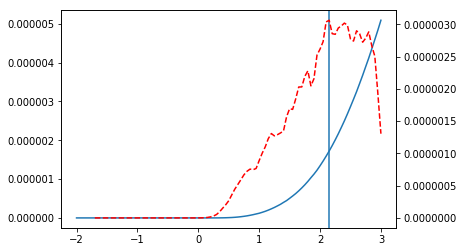

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

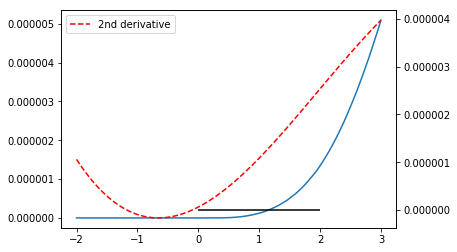

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

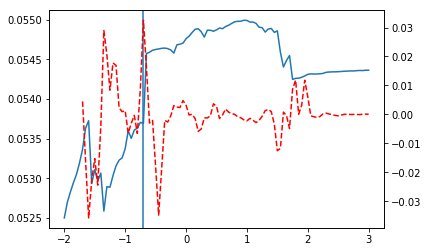

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

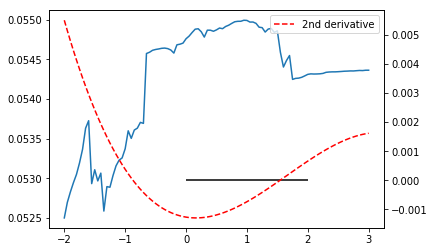

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

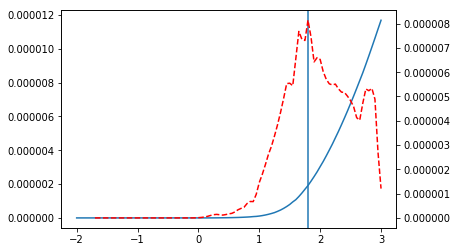

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

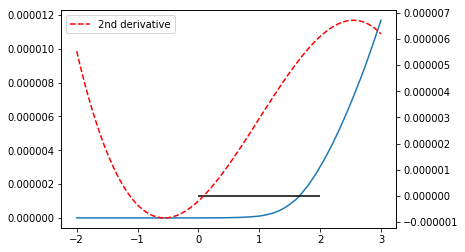

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

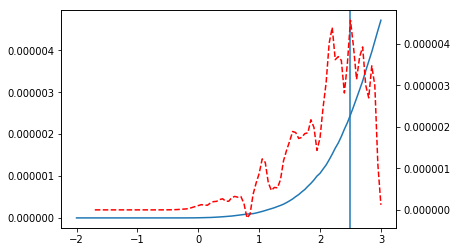

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

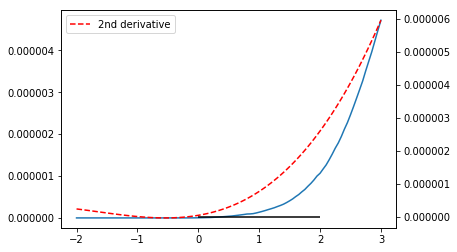

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

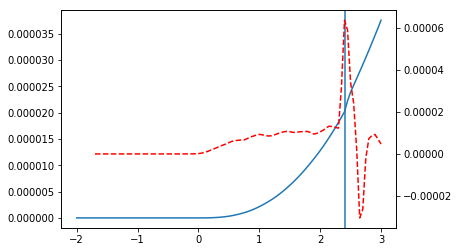

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

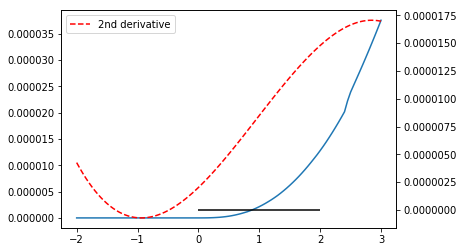

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

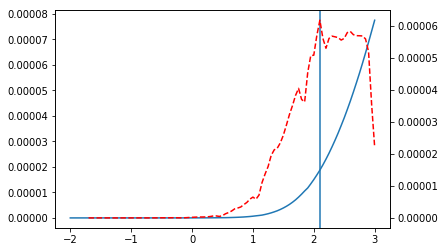

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

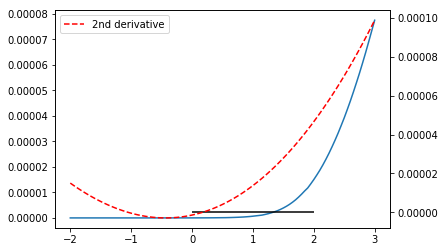

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

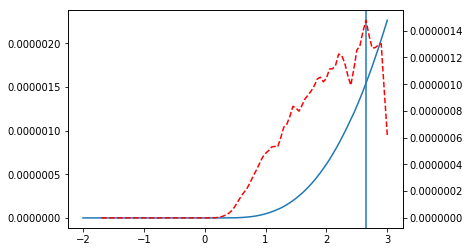

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

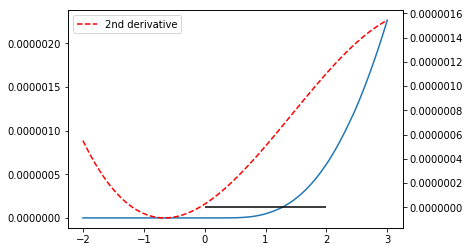

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

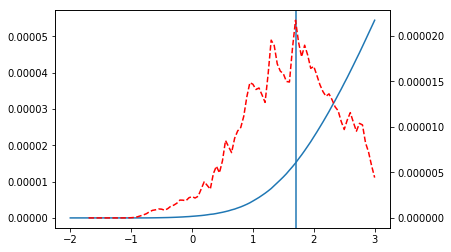

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

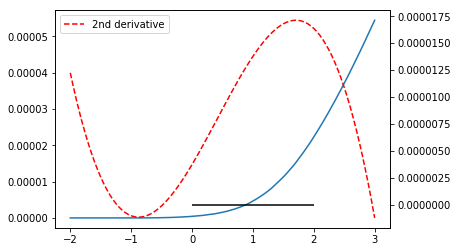

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

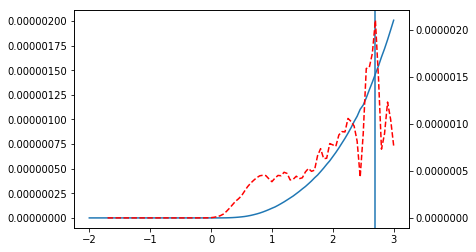

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

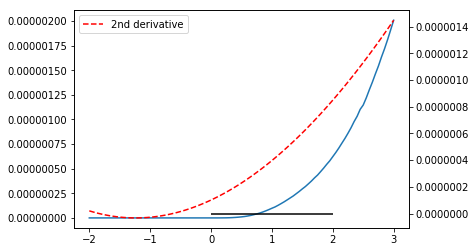

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

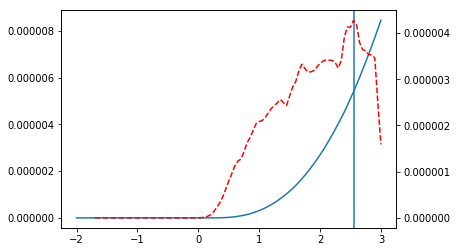

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 216x216 with 0 Axes>

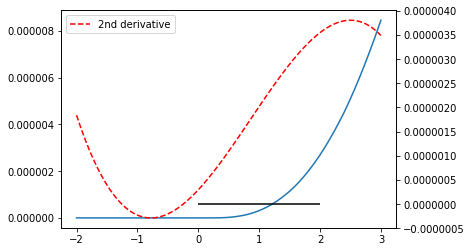

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
#@title derivative plots main
#load the data
url='https://raw.githubusercontent.com/leoUninova/for-stack-excahgne/master/one.csv'
df1=pd.read_csv(url)
df1 = df1[df1.Curve == 'Transfer stab']

#make dataset smaller so it's easier to plot
names=list(df1.Name.unique()[:10])
df1 = df1[df1['Name'].isin(names)]
#class for subsetting data
sub=Subsetting()




tb = widgets.TabBar(names)
for i, name in enumerate (names):
  df2=sub.SubsetVariable(df1, Name=name)
  df2=sub.subset
  df2=df2.apply(pd.to_numeric, downcast='signed', errors='ignore')
  df2.reset_index()
  
  with tb.output_to(i, select=(i < 1)):
    create_tab('start')
    
    
    